In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("C:/Users/Madhuri/Desktop/DS-ML/probability-stats/data/walmart_data.csv")

In [56]:
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343511,1004867,P00156742,M,26-35,16,A,3,0,5,8617
382530,1004837,P00267342,M,26-35,5,B,2,0,1,15165
427174,1005766,P00147942,M,55+,14,C,0,1,1,15347
242228,1001331,P00089342,M,46-50,0,C,4+,1,8,10066
542759,1005568,P00143342,M,18-25,4,C,3,0,1,11478
398616,1001340,P00005042,M,26-35,7,A,2,0,6,16050
225183,1004673,P00338742,M,36-45,16,B,2,1,5,3763
369059,1002872,P00205942,M,26-35,20,B,1,0,5,7011
291566,1002967,P00028042,M,26-35,0,A,1,0,1,4515
235097,1000245,P00186642,M,36-45,16,B,0,0,2,10138


In [57]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [58]:
df.shape

(550068, 10)

In [59]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [60]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [61]:
df["User_ID"].nunique()

5891

In [62]:
df["Product_ID"].nunique()

3631

In [63]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [64]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [65]:
np.sort(df["Occupation"].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [66]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [67]:
np.sort(df["Product_Category"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [68]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [69]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

### User count

In [70]:
df_gender_with_dup = df[["User_ID","Gender"]]
df_gender = df_gender_with_dup.drop_duplicates(subset=["User_ID", "Gender"])
df_gender["Gender"].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

### Most sold product category

In [71]:
df["Product_Category"].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [72]:
df_male = df[df["Gender"] == "M"].reset_index(drop=True)
df_female = df[df["Gender"] == "F"].reset_index(drop=True)

In [73]:
df_male.shape , df_female.shape

((414259, 10), (135809, 10))

In [74]:
df_male["Purchase"].describe()

count    414259.00000
mean       9437.52604
std        5092.18621
min          12.00000
25%        5863.00000
50%        8098.00000
75%       12454.00000
max       23961.00000
Name: Purchase, dtype: float64

In [75]:
df_female["Purchase"].describe()

count    135809.000000
mean       8734.565765
std        4767.233289
min          12.000000
25%        5433.000000
50%        7914.000000
75%       11400.000000
max       23959.000000
Name: Purchase, dtype: float64

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


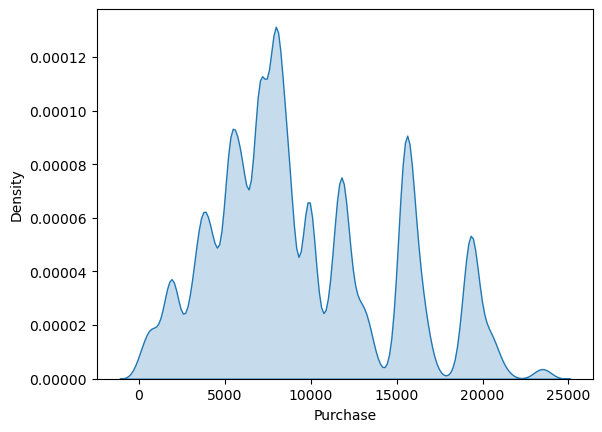

In [76]:
sns.kdeplot(data=df_male["Purchase"],fill=True)
plt.show()

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


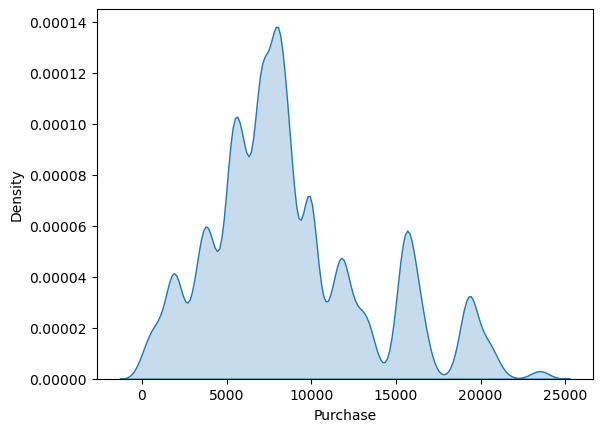

In [77]:
sns.kdeplot(data=df_female["Purchase"],fill=True)
plt.show()

### Age and Gender order count 

In [78]:
pd.crosstab(index =df['Age'],columns = df['Gender'],margins = True)

Gender,F,M,All
Age,,,
0-17,5083,10019,15102
18-25,24628,75032,99660
26-35,50752,168835,219587
36-45,27170,82843,110013
46-50,13199,32502,45701
51-55,9894,28607,38501
55+,5083,16421,21504
All,135809,414259,550068


###  Female Customers Purchases based on Age group

In [79]:
df_female.groupby("Age")["Purchase"].sum()

Age
0-17      42385978
18-25    205475842
26-35    442976233
36-45    243438963
46-50    116706864
51-55     89465997
55+       45782765
Name: Purchase, dtype: int64

In [80]:
df_female.groupby("Age")["Purchase"].min()

Age
0-17     12
18-25    12
26-35    12
36-45    12
46-50    12
51-55    12
55+      12
Name: Purchase, dtype: int64

In [81]:
df_female.groupby("Age")["Purchase"].max()

Age
0-17     23866
18-25    23936
26-35    23955
36-45    23948
46-50    23920
51-55    23959
55+      23899
Name: Purchase, dtype: int64

### Male Customers Purchases based on Age group

In [82]:
df_male.groupby("Age")["Purchase"].sum()

Age
0-17       92527205
18-25     708372833
26-35    1588794345
36-45     783130921
46-50     304136539
51-55     277633647
55+       154984610
Name: Purchase, dtype: int64

In [83]:
df_male.groupby("Age")["Purchase"].min()

Age
0-17     12
18-25    12
26-35    12
36-45    12
46-50    12
51-55    12
55+      12
Name: Purchase, dtype: int64

In [84]:
df_male.groupby("Age")["Purchase"].max()

Age
0-17     23955
18-25    23958
26-35    23961
36-45    23960
46-50    23960
51-55    23960
55+      23960
Name: Purchase, dtype: int64

### Male customers are the highest purchasers

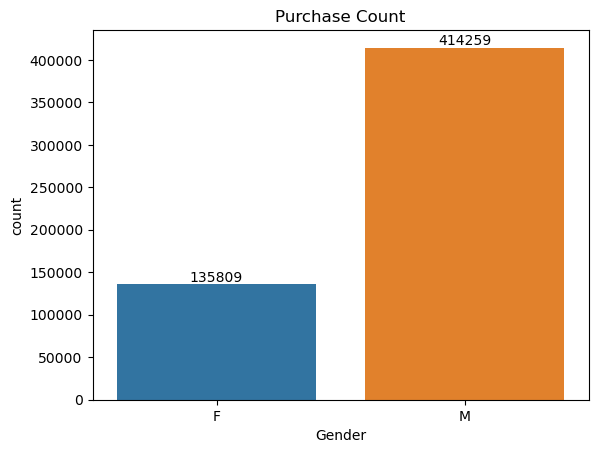

In [85]:
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Purchase Count")
plt.show()

### Total Purchase by Gender

In [86]:
df_female["Purchase"].sum() , df_male["Purchase"].sum()

(1186232642, 3909580100)

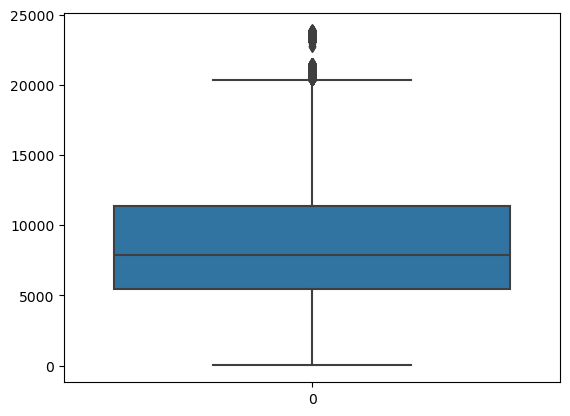

In [87]:
sns.boxplot(data=df_female["Purchase"])
plt.show()

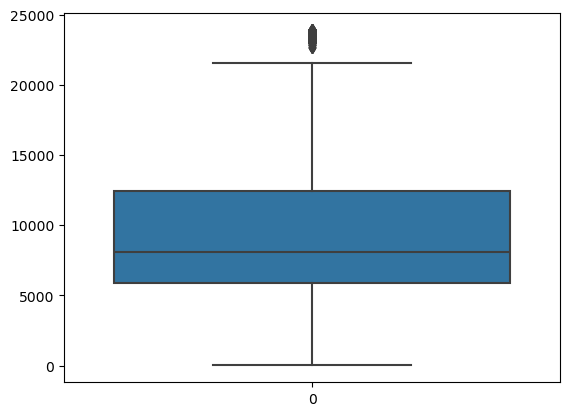

In [88]:
sns.boxplot(data=df_male["Purchase"])
plt.show()

### Female Order Count based on Age

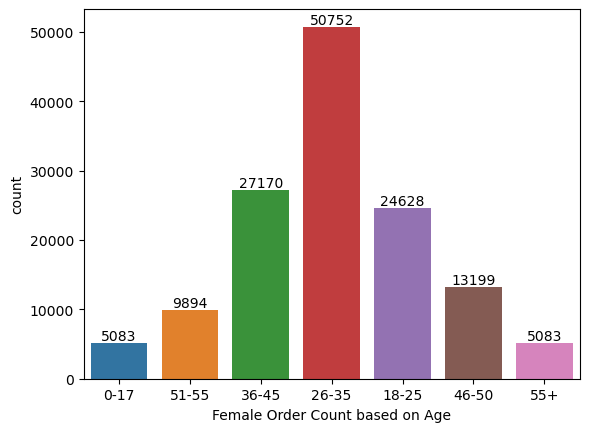

In [89]:
ax = sns.countplot(data=df_female,x="Age")
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel("Female Order Count based on Age")
plt.show()

### Male Order Count based on Age

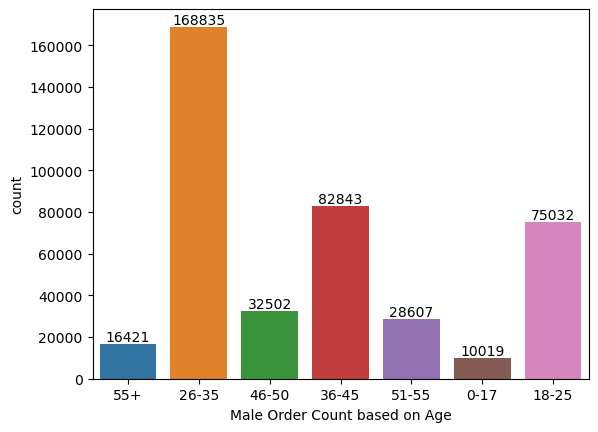

In [90]:
ax = sns.countplot(data=df_male,x="Age")
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel("Male Order Count based on Age")
plt.show()

### Overall order count based on Age

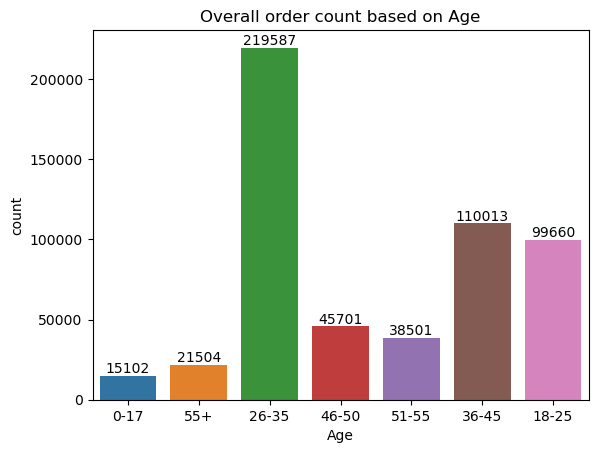

In [91]:
ax = sns.countplot(data = df, x = "Age")
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Overall order count based on Age")
plt.show()

### Order count based on occupation

In [92]:
df_occ_counts = df.groupby(['Occupation']).size().to_frame("occ_count").reset_index()

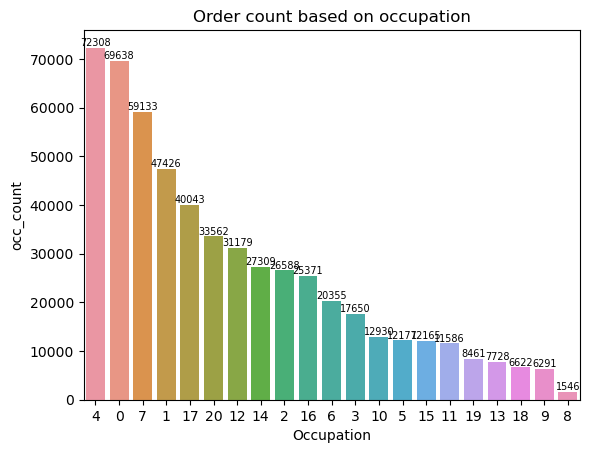

In [93]:
ax = sns.barplot(data=df_occ_counts, x="Occupation", y="occ_count",
            order = df_occ_counts.sort_values('occ_count',ascending = False)["Occupation"])
ax.bar_label(ax.containers[0], fontsize=7);
plt.title("Order count based on occupation")
plt.show()

### Order count based on City

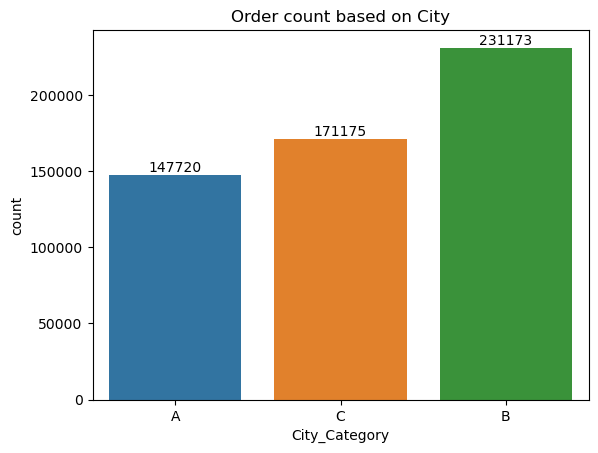

In [94]:
ax = sns.countplot(data = df, x = "City_Category")
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Order count based on City")

plt.show()

### Order count based on stay years in a city

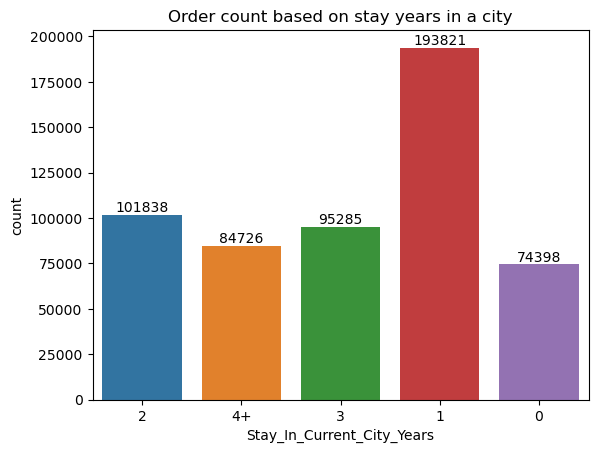

In [95]:
ax = sns.countplot(data = df, x = "Stay_In_Current_City_Years")
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Order count based on stay years in a city")
plt.show()

### Order count by Maritial status

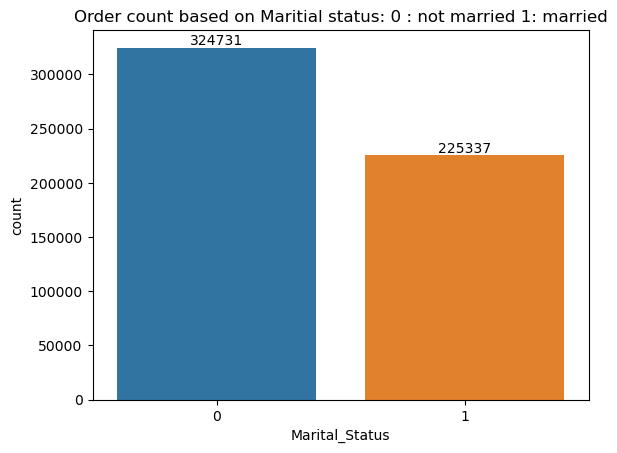

In [96]:
ax = sns.countplot(data = df, x = "Marital_Status")
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Order count based on Maritial status: 0 : not married 1: married")
plt.show()

### Order count based on product category

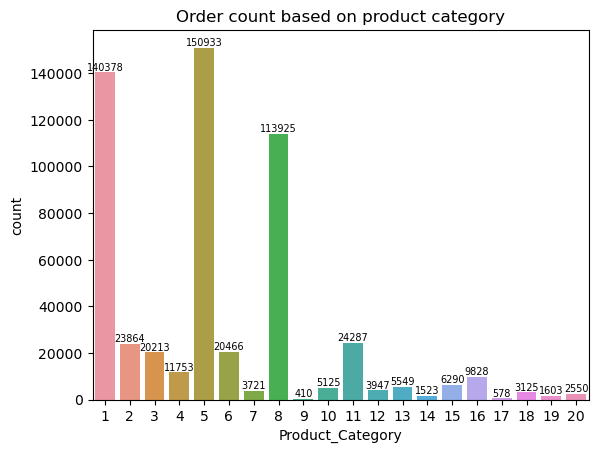

In [97]:
ax = sns.countplot(data = df, x = "Product_Category")
ax.bar_label(ax.containers[0], fontsize=7);
plt.title("Order count based on product category")
plt.show()

### Top 5 product  ordered by unmarried female

In [98]:
dff_un = df_female[df_female["Marital_Status"] == 0]

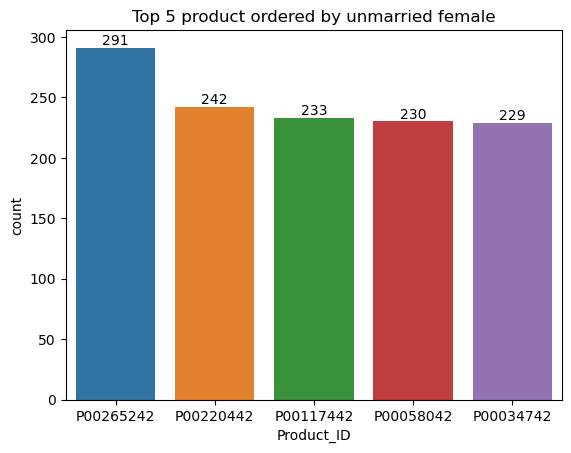

In [99]:
ax = sns.countplot(data = dff_un, x = "Product_ID",order = dff_un["Product_ID"].value_counts().index[0:5])
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Top 5 product ordered by unmarried female")
plt.show()

### Top 5 product ordered by married female

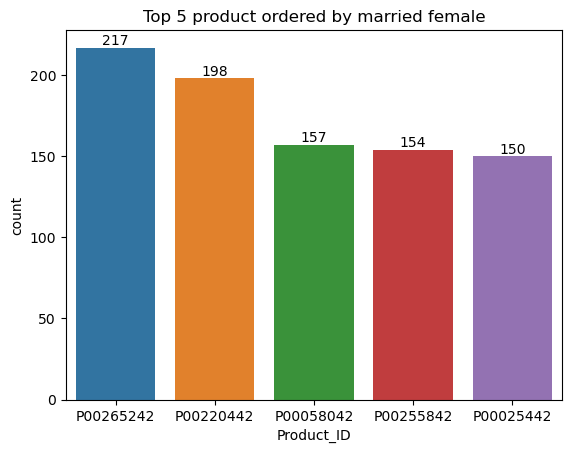

In [100]:
dff_m = df_female[df_female["Marital_Status"] == 1]
ax = sns.countplot(data = dff_m, x = "Product_ID",order = dff_m["Product_ID"].value_counts().index[0:5])
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Top 5 product ordered by married female")
plt.show()

### Top 5 product  ordered by unmarried male

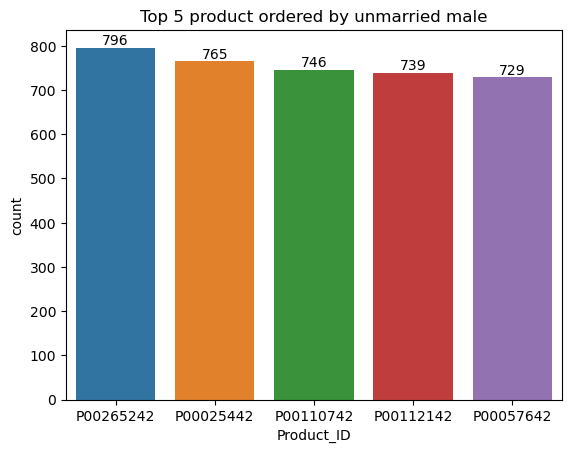

In [101]:
dfm_un = df_male[df_male["Marital_Status"] == 0]
ax = sns.countplot(data = dfm_un, x = "Product_ID",order = dfm_un["Product_ID"].value_counts().index[0:5])
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Top 5 product ordered by unmarried male")
plt.show()

### Top 5 product  ordered by married male

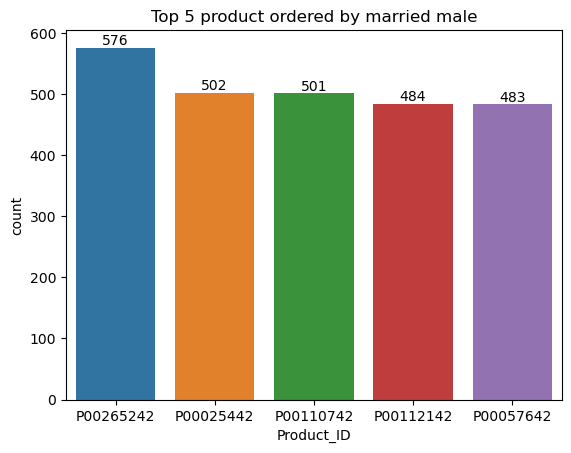

In [102]:
dfm_m = df_male[df_male["Marital_Status"] == 1]
ax = sns.countplot(data = dfm_m, x = "Product_ID",order = dfm_m["Product_ID"].value_counts().index[0:5])
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Top 5 product ordered by married male")
plt.show()

### CLT with Sample Normal distribution data

#### Population distribution

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


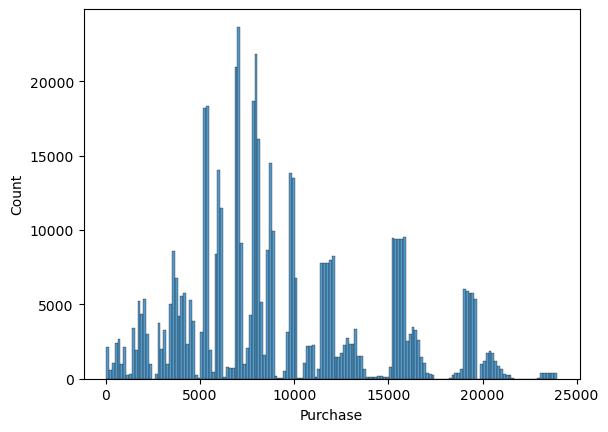

In [103]:
sns.histplot(df["Purchase"], kde=False)
plt.show()

#### 95% Confidence Interval 

In [104]:
np.percentile(df["Purchase"], 2.5),np.percentile(df["Purchase"], 97.5)

(1415.675000000001, 19703.0)

#### Sample distribution

In [105]:
sample_1 = [np.mean(df["Purchase"].sample(20)) for i in range(10000) ]

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

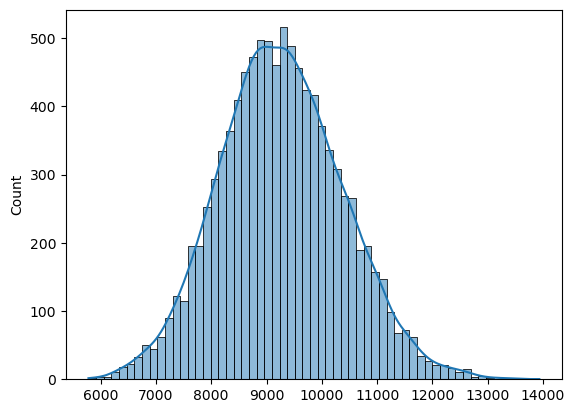

In [106]:
sns.histplot(sample_1, kde=True)

### Sample mean  is almost equal to population mean.
### Sample standard deviation will be less than population std as we increase sample size.

In [107]:
pop_mean = np.mean(df["Purchase"])
pop_std = np.std(df["Purchase"]) 
sam_mean = np.mean(sample_1)
sam_std = np.std(sample_1)
print("Popluation mean:",pop_mean)
print("Sample mean:",sam_mean)
print("Population std:",pop_std)
print("Sample std:",sam_std)


Popluation mean: 9263.968712959126
Sample mean: 9266.60205
Population std: 5023.060827959972
Sample std: 1113.4194049751861


#### 95% Confidence Interval 

In [108]:
np.percentile(sample_1, 2.5),np.percentile(sample_1, 97.5)

(7167.762500000001, 11534.908749999999)

### Confidence interval using Bootstrap for Female customers

In [109]:
sample_2 = [np.mean(df_female["Purchase"].sample(1)) for i in range(10000) ]

In [110]:
sample_3 = [np.mean(df_female["Purchase"].sample(1)) for i in range(10000)]

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

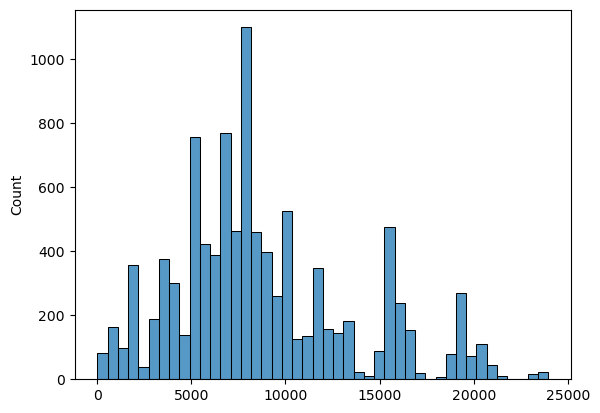

In [111]:
sns.histplot(sample_2)

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

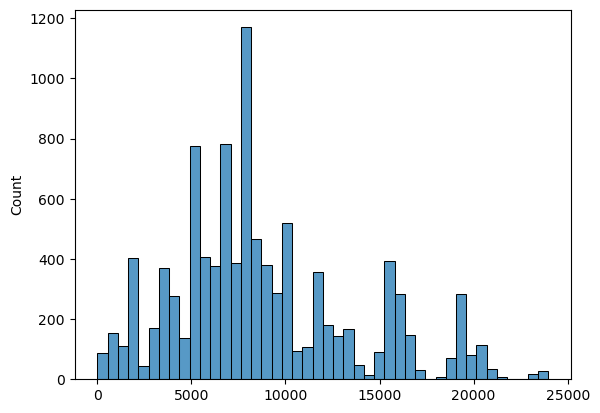

In [112]:
sns.histplot(sample_3)

### 95% Confidence Interval 

In [113]:
np.percentile(sample_2, 2.5),np.percentile(sample_2, 97.5)

(1369.0, 19653.0)

In [114]:
np.percentile(sample_3, 2.5),np.percentile(sample_3, 97.5)

(1378.95, 19670.025)

### Confidence interval using Bootstrap for Male customers

In [115]:
sample_4 = [np.mean(df_male["Purchase"].sample(1)) for i in range(10000)]

In [116]:
sample_5 = [np.mean(df_male["Purchase"].sample(1)) for i in range(10000)]

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


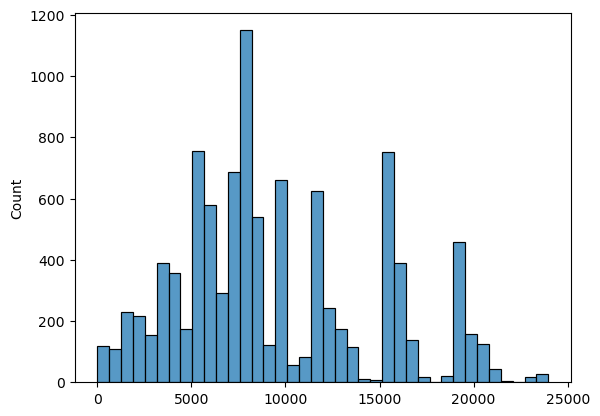

In [117]:
sns.histplot(sample_4)
plt.show()

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


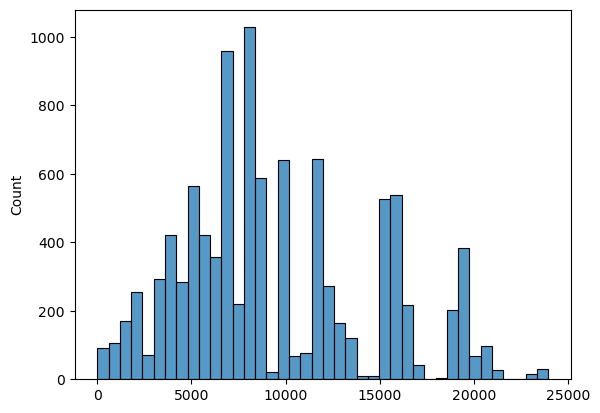

In [118]:
sns.histplot(sample_5)
plt.show()

### 95% Confidence Interval

In [119]:
np.percentile(sample_4, 2.5),np.percentile(sample_4, 97.5)

(1413.875, 19711.674999999916)

In [120]:
np.percentile(sample_5, 2.5),np.percentile(sample_5, 97.5)

(1530.975, 19691.05)

### Confidence interval using Bootstrap for Un married customers

In [121]:
df_ummarried = df[df["Marital_Status"] == 0].reset_index(drop=True)
df_married = df[df["Marital_Status"] == 1].reset_index(drop=True)

In [122]:
sample_6 = [np.mean(df_ummarried["Purchase"].sample(1)) for i in range(10000)]

In [123]:
sample_7 = [np.mean(df_ummarried["Purchase"].sample(1)) for i in range(10000)]

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


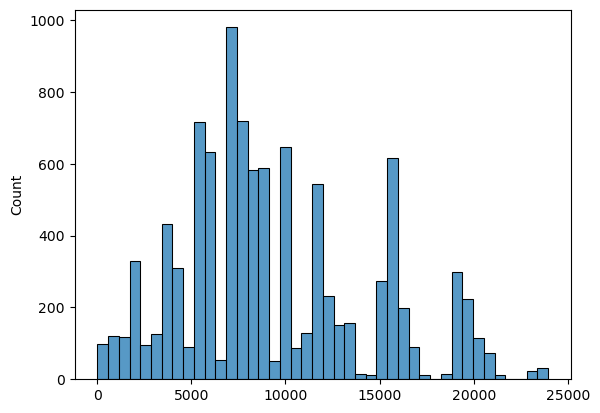

In [124]:
sns.histplot(sample_6)
plt.show()

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


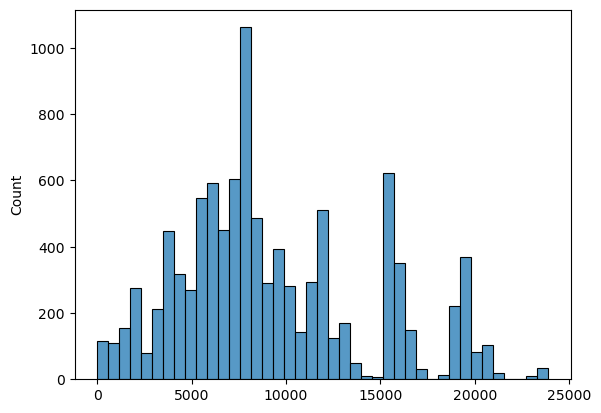

In [125]:
sns.histplot(sample_7)
plt.show()

### 95% Confidence Interval

In [126]:
np.percentile(sample_6, 2.5),np.percentile(sample_6, 97.5)

(1424.9, 19985.225)

In [127]:
np.percentile(sample_7, 2.5),np.percentile(sample_7, 97.5)

(1414.975, 19704.025)

### Confidence interval using Bootstrap for married customers

In [128]:
sample_8 = [np.mean(df_married["Purchase"].sample(1)) for i in range(10000)]

In [129]:
sample_9 = [np.mean(df_married["Purchase"].sample(1)) for i in range(10000)]

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


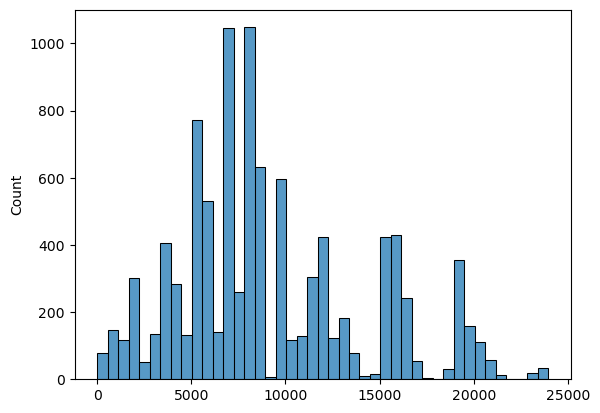

In [130]:
sns.histplot(sample_8)
plt.show()

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


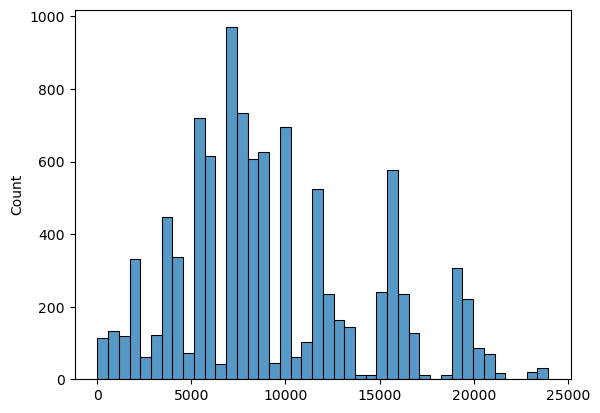

In [131]:
sns.histplot(sample_9)
plt.show()

### 95% Confidence Interval

In [132]:
np.percentile(sample_8, 2.5),np.percentile(sample_8, 97.5)

(1402.975, 19948.0)

In [133]:
np.percentile(sample_9, 2.5),np.percentile(sample_9, 97.5)

(1379.975, 19692.0)

### Suggestions

####  26-35 Age group people are the most buyers. By focussing on age group 18-25	we can build a loyal customer base that will help in long term relationship .
####  Male customers are more than 3 times the female customers. By having a dedicated offers we can bring down the difference.
####  Customers from occupation 8 and 9 are least buyers. Analysing the data related to these occupation we can come up with a strategy to improve. 
####  Product category 1,8 and 5 are most sold categories which is contributing most of the revenue for the compnay.Try to increase the sales of other product categroy by tailor made offers and promotions.